# Technical Analysis of Stock Prices

This notebook analyzes the historical price data of a selected stock using technical indicators like SMA, EMA, and RSI

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ticker = 'AAPL' # Here you can change it to TSLA, MSFT, etc.
df = yf.download(ticker, start='2020-01-01', end='2024-01-01')
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [4]:
# SMA (Simple Moving Average) & EMA (Exponensial Moving Average)
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# RSI (Relative Strength Index)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain/avg_loss
rsi = 100 - (100 / (1 + rs))
df['RSI_14'] = rsi

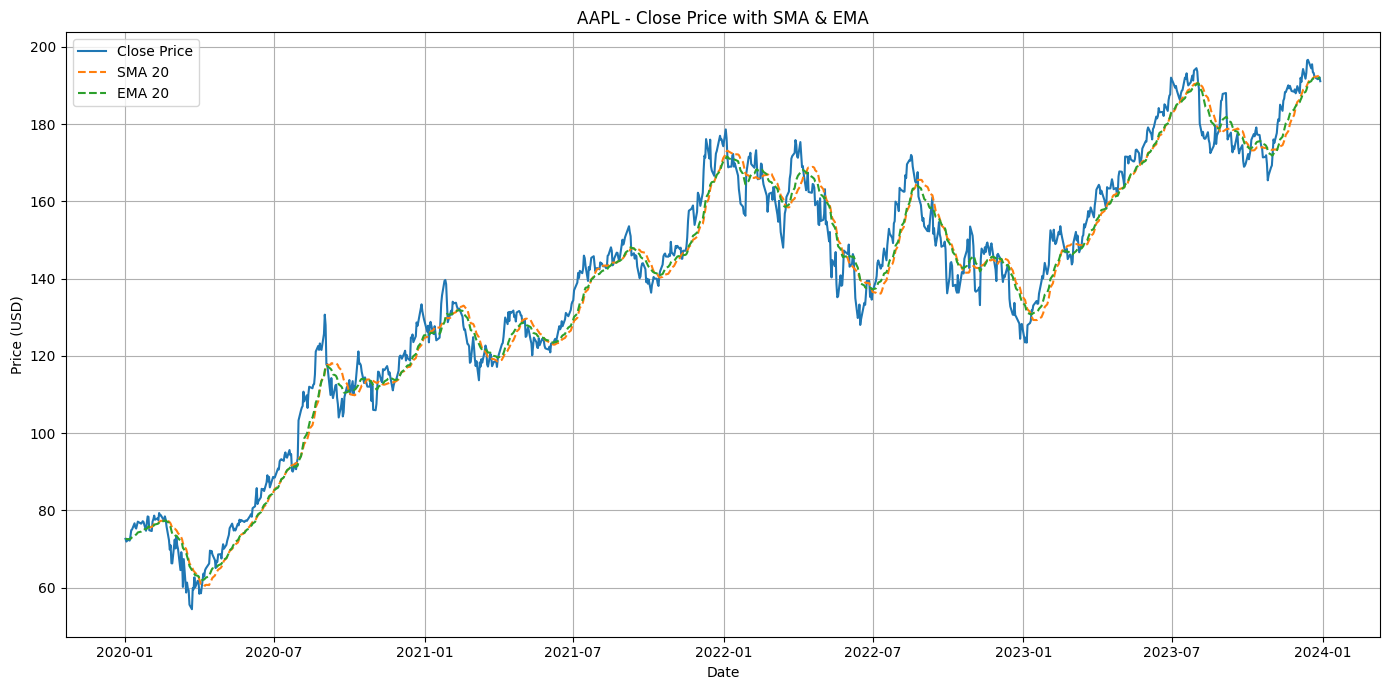

In [8]:
# SMA & EMA graphic
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['EMA_20'], label='EMA 20', linestyle='--')
plt.title(f'{ticker} - Close Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

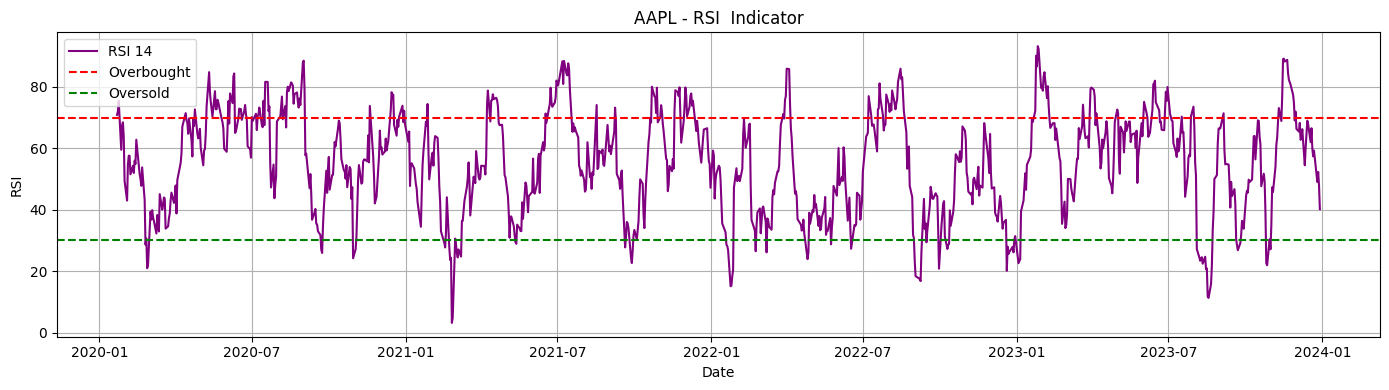

In [9]:
# RSI graphic
plt.figure(figsize=(14,4))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{ticker} - RSI  Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretation
- The SMA and EMA help smooth out price action and identify trends.
- RSI indicates potential overbought (>70) or oversold (<30) conditions.
- From the chart, we can observe that when RSI dips below 30, the stock often rebounds.